In [54]:
!pip install tensorflow

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split

mnist = pd.read_csv('mnist.csv')
X = mnist.iloc[:,:-1].values
y = mnist.iloc[:,784].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [56]:
print(y)

[5 0 4 ... 4 5 6]


In [57]:
# Load and preprocess MNIST data
X_train = X_train.reshape(-1, 784).astype('float32') / 255  # Combined reshape and type conversion
X_test = X_test.reshape(-1, 784).astype('float32') / 255
y_train = keras.utils.to_categorical(y_train, 10)  # Combined one-hot encoding
y_test = keras.utils.to_categorical(y_test, 10)

In [58]:
print(y_train[0]) 


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [59]:
# Define and compile the Keras model
model = keras.Sequential([
    keras.Input(shape=(784,)), 
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [71]:
# Train and evaluate the model
model.fit(X_train, y_train, epochs=10, batch_size=32)
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}\nTest Accuracy: {accuracy}")

Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9552 - loss: 0.1446
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9573 - loss: 0.1370
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9607 - loss: 0.1248
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9623 - loss: 0.1195
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9648 - loss: 0.1119
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9638 - loss: 0.1166
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9652 - loss: 0.1066
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9662 - loss: 0.1052
Epoch 9/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9658 - loss: 0.1049
Epoch 10/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9672 - loss: 0.0988
Test Loss: 0.09986862540245056
Test Accuracy: 0.9727857112884521


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[4.32748896e-14 3.51184643e-22 1.09979102e-10 1.88289292e-14
  1.00000000e+00 4.29337642e-11 1.39049015e-12 4.23298339e-08
  1.88268817e-10 5.60634261e-10]
 [1.04945079e-16 3.15951959e-10 2.19248664e-11 1.00000000e+00
  4.37114396e-16 2.17527845e-08 3.41352902e-27 6.77815145e-14
  2.66595513e-11 1.62906826e-08]
 [1.33117878e-17 1.11405703e-13 1.58910940e-09 1.73339140e-06
  7.46009710e-16 1.78282857e-11 3.21354638e-23 9.99997854e-01
  3.02516355e-07 3.84825434e-08]
 [6.49747942e-13 4.89181325e-24 6.25966607e-07 3.62409477e-11
  2.23082796e-04 1.71171746e-12 2.77078665e-16 4.11873742e-07
  6.37740555e-11 9.99775946e-01]
 [2.07478177e-08 9.35857481e-16 9.72321601e-08 1.29490754e-12
  7.12419350e-08 8.74566055e-08 9.99999642e-01 1.32394540e-12
  2.60412178e-12 2.39274250e-15]
 [2.01605399e-12 3.10808914e-14 3.67767528e-09 1.54081863e-06
  3.68348602e-10 1.18407559e-06 2.50115846e-13 7.17911453e-10
  9.99997258e-0

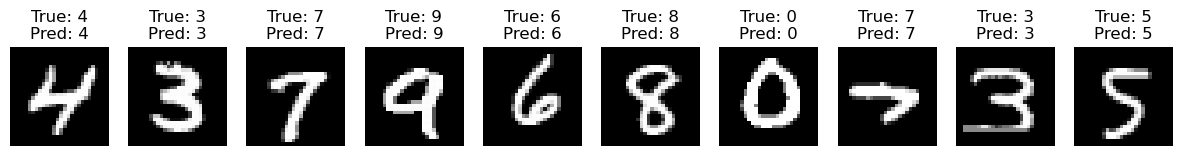

In [75]:
# Visualize predictions (optional)
num_images = 10
indices = np.random.choice(len(X_test), num_images, replace=False)
X_test_vis = X_test[indices].reshape(-1, 28, 28)  # Reshape for display
true_labels_vis = np.argmax(y_test[indices], axis=1)
predicted_labels_vis = np.argmax(model.predict(X_test[indices]), axis=1) #Combined prediction and argmax
print((model.predict(X_test[indices])))
      
fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test_vis[i], cmap='gray')
    ax.set_title(f"True: {true_labels_vis[i]}\nPred: {predicted_labels_vis[i]}")
    ax.axis('off')
plt.show()